In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [2]:
class Node:
    
    def __init__(self, node_id, depth = None, child = None, parent = None, loc = None):
        self.id = node_id
        self.depth = depth
        self.state = None
        self.children = child
        self.parent = parent
        self.location = loc

class Noisy_Tree:
    
    def __init__(self, seed_nodes):
        
        self.seed_nodes = seed_nodes
        self.size = len(seed_nodes)## seed nodes and the root node
        
        self.root = Node(-1)
        self.root.depth = 0
        self.root.location = (0,0,0)
        self.root.parent = None
        self.root.children = self.seed_nodes
        
        
        for j,e in enumerate(self.seed_nodes):
            e.depth = 1
            e.location = (e.depth, np.sin(e.id*(1/(self.size))*2*np.pi), np.cos(e.id*(1/(self.size)*2*np.pi)))
            e.parent = self.root
            e.children = None
            
        self.nodes = seed_nodes
        self.leaf = seed_nodes
        self.height = 1
        
    def make_tree(self, height, branching_constant):
        new_branch = []
        for i in range(height):
            node_id = 0
            
            for j,f in enumerate(self.leaf):
                node_id = j * branching_constant
                new_branch = [Node(node_id + k, 
                                   depth = 2 + i, 
                                   parent = f, 
                                   loc = (2 + i, 
                                          np.sin((node_id + k)*(1/(branching_constant*len(self.leaf)))*2*np.pi), 
                                          np.cos((node_id + k)*(1/(branching_constant*len(self.leaf)))*2*np.pi)))  
                              for k in range(branching_constant)]
                
                f.children = new_branch
                self.nodes = self.nodes + new_branch
                
            self.leaf_update()
                
        self.size = len(self.nodes)
        self.height = 1 + height
        
        return(None)
        
    def leaf_update(self):
        leaves = []
        
        for i,e in enumerate(self.nodes):
            if e.children == None: leaves.append(e)
        self.leaf = leaves
        
        return(None)
    
    def get_generations(self, n):
        nth_generation = []
        for i,e in enumerate(self.nodes):
            if e.depth == n: nth_generation.append(e)
        return(nth_generation)
    
    def display_2d(self, ax):
        
        layer_colors = {'1':'r', '2':'b', '3':'g', '4':'black', '5':'purple', '6':'yellow'}
        gen = 0
        
        for i in range(self.size):
            if gen != self.nodes[i].location[0]:
                ax.scatter(self.nodes[i].location[0]*self.nodes[i].location[1],
                              self.nodes[i].location[0]*self.nodes[i].location[2], 
                              c =layer_colors['%d'%self.nodes[i].location[0]], 
                              label = 'Generation %d'%(self.nodes[i].location[0]), s = 10)
                gen = self.nodes[i].location[0] 
                
            else:ax.scatter(self.nodes[i].location[0]*self.nodes[i].location[1],
                              self.nodes[i].location[0]*self.nodes[i].location[2], 
                              c =layer_colors['%d'%self.nodes[i].location[0]], s = 10)
        
            ax.legend()
            
        ax.set_title('%d-Branching Tree of height %d'%(len(self.nodes[-1].parent.children),self.height))
        
    def display_3d(self, ax):
        
        layer_colors = {'1':'r', '2':'b', '3':'g', '4':'black', '5':'purple', '6':'yellow'}

        
        for i in range(self.size):
            ax.scatter(xs = self.nodes[i].location[0]*self.nodes[i].location[1], 
                           ys = self.nodes[i].location[0]*self.nodes[i].location[2],
                           zs = self.nodes[i].location[0], 
                           s = 10, 
                           c = layer_colors['%d'%self.nodes[i].location[0]], 
                           depthshade = True)
            
        ax.set_title('%d-Branching Tree of height %d'%(len(self.nodes[-1].parent.children), self.height))

In [3]:
nodes = []
seed = 5
for j in range(seed):
    nodes.append(Node(j))
NT3 = Noisy_Tree(nodes)
NT5 = Noisy_Tree(nodes)

In [4]:
NT3.make_tree(4,3)
NT5.make_tree(2,5)

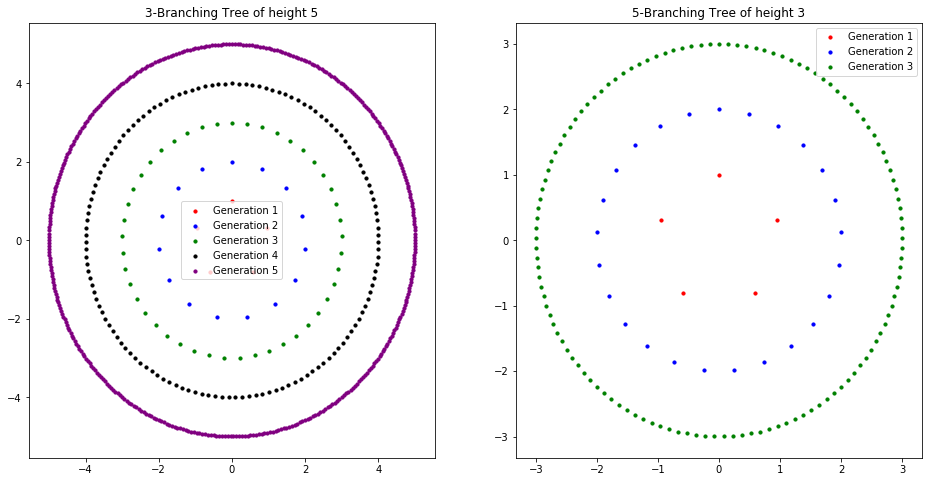

In [5]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
NT3.display_2d(ax = ax[0])
NT5.display_2d(ax = ax[1])

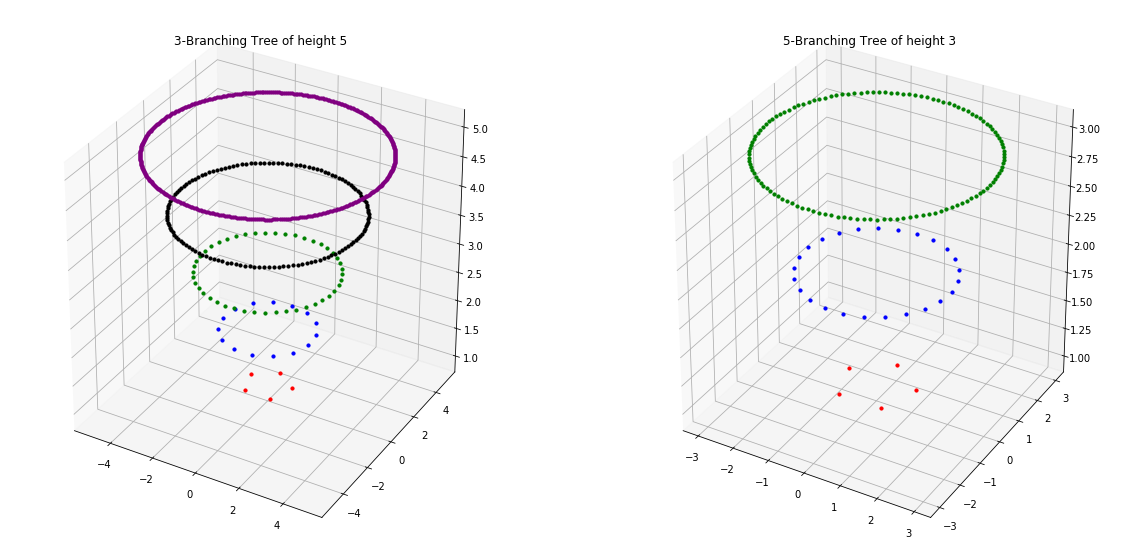

In [6]:
fig = plt.figure(figsize = (20,10))
ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122, projection = '3d')
NT3.display_3d(ax = ax0)
NT5.display_3d(ax = ax1)